In [1]:
import numpy as np  # Импорт библиотеки NumPy для работы с массивами и математическими операциями
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib для визуализации данных
import pandas as pd  # Импорт библиотеки Pandas для работы с данными в виде таблицы DataFrame

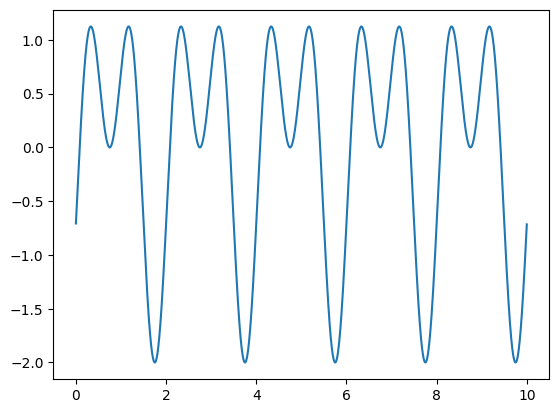

In [2]:
t = np.arange(0, 10, 0.001)  # Создание массива времени от 0 до 10 с шагом 0.001
s = np.sin(2*np.pi*t) + np.sin(2*np.pi*t/2 - np.pi/4)  # Генерация сигнала, состоящего из двух синусоид с разными частотами
plt.plot(t, s)  # Построение графика сигнала
plt.show()  # Отображение графика

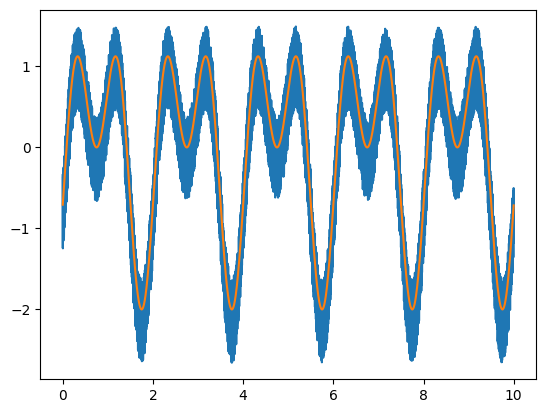

In [3]:
n = np.random.uniform(np.min(s)/3, np.max(s)/3, len(t))  # Генерация случайного шума
sn = s + n  # Добавление шума к оригинальному сигналу
plt.plot(t, sn)  # Построение графика сигнала с шумом
plt.plot(t, s)  # Построение графика оригинального сигнала
plt.show()  # Отображение графиков

In [4]:
fil = np.ones(100)  # Создание фильтра в виде массива из 100 единиц

s_for_conv = np.ones(len(s) + 2 * len(fil) // 2 - 1)  # Создание массива для свертки, добавляются пустые элементы по бокам
s_for_conv[len(fil)//2:len(fil)//2+len(s)] = sn  # Заполнение центральной части массива значениями сигнала с шумом
print(len(s_for_conv))  # Вывод длины массива для свертки

10099


In [5]:
s_matrix = []  # Создание пустого списка для хранения матрицы срезов
for i in range(len(s)):
    s_matrix.append(s_for_conv[i:i+len(fil)])  # Формирование срезов и добавление их в список
print(len(s_matrix))  # Вывод количества срезов
s_matrix = np.array(s_matrix)  # Преобразование списка в массив NumPy
print(s_matrix.shape)  # Вывод формы полученной матрицы

10000
(10000, 100)


In [6]:
c = np.linalg.lstsq(s_matrix, s, rcond=None)[0]  # Решение линейной системы уравнений методом наименьших квадратов
print(c)  # Вывод коэффициентов регрессии

[0.0060323  0.00600141 0.00575554 0.00569322 0.0055985  0.00584908
 0.00538073 0.00512721 0.00478673 0.00509127 0.00491564 0.00528503
 0.00531633 0.00520973 0.00502544 0.00475848 0.00491693 0.00520641
 0.00540598 0.00590039 0.00615347 0.00668557 0.00712045 0.00695073
 0.00736382 0.00739162 0.00746773 0.00805657 0.00817242 0.00841719
 0.00854394 0.00932093 0.00953035 0.01022397 0.01094478 0.01183236
 0.01220602 0.01270335 0.01368235 0.01410251 0.01472155 0.01583478
 0.01701655 0.0181839  0.01899559 0.02010318 0.02149928 0.02292624
 0.02450776 0.02570526 0.02738884 0.02546235 0.02456361 0.02356483
 0.02196184 0.02041503 0.01963427 0.01832893 0.01728821 0.01684733
 0.01595061 0.01493419 0.01437482 0.01356796 0.01280665 0.01207359
 0.01129586 0.01079295 0.00979166 0.00939777 0.00932187 0.00862795
 0.00823513 0.00822043 0.00829939 0.00797316 0.00774072 0.00713171
 0.00635468 0.00564089 0.00564125 0.00492254 0.00514935 0.00468655
 0.00457297 0.00466416 0.00502327 0.00477439 0.00416112 0.0040

<ipython-input-6-0c9ba1b11798>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(s_matrix, s)


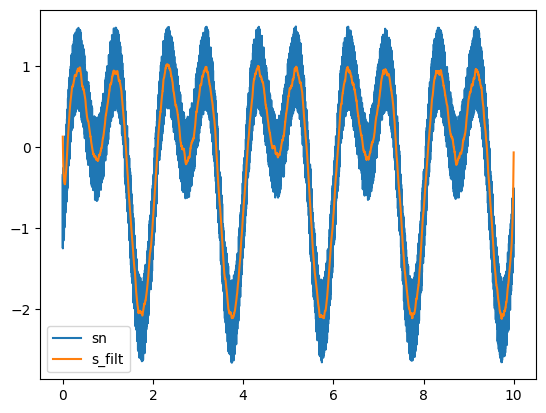

In [7]:
s_filt = s_matrix @ c  # Применение коэффициентов регрессии для фильтрации сигнала
plt.plot(t, sn, label='sn')  # Построение графика сигнала с шумом
plt.plot(t, s_filt, label='s_filt')  # Построение графика отфильтрованного сигнала
plt.legend()  # Отображение легенды
plt.show()  # Отображение графиков

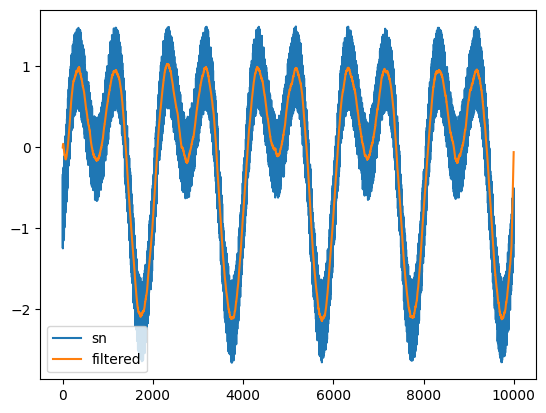

In [8]:
mu = 0.00001  # Установка значения коэффициента обучения

fil = np.zeros(len(fil))  # Создание нулевого массива для весов фильтра
filtered = []  # Создание пустого списка для хранения отфильтрованных значений

for i in range(len(s_matrix)):
    e = s_matrix[i] - fil @ s_matrix[i]  # Вычисление ошибки
    filtered.append(fil @ s_matrix[i])  # Добавление отфильтрованного значения в список
    A = np.tile(s_matrix[i], ((len(fil), 1))).T  # Создание матрицы A для вычисления градиента
    fil = fil + mu * A @ e  # Обновление весов фильтра с использованием метода стохастического градиента

plt.plot(sn, label='sn')  # Построение графика сигнала с шумом
plt.plot(filtered, label='filtered')  # Построение графика отфильтрованного сигнала
plt.legend()  # Отображение легенды
plt.show()  # Отображение графиков